<a href="https://colab.research.google.com/github/Shilpa2002445/Hello/blob/main/Copy_of_Stock_Market_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Stock Market Prediction

**Installing kaggle and uploading the datasets from Kaggle**

In [ ]:
#install kaggle
!pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shettyshilpasitaram","key":"457a930a3ac1168836330eb1d3d2f5a5"}'}

In [ ]:
#create a kaggle folder
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
#copy the kaggle.json to folder created
! cp kaggle.json ~/.kaggle/

In [ ]:
#permission for json to act
! chmod 600 ~/.kaggle/kaggle.json

In [ ]:
#to list all the datasets in the kaggle
! kaggle datasets list

ref                                                                title                                               size  lastUpdated          downloadCount  voteCount  usabilityRating  
-----------------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
nelgiriyewithana/apple-quality                                     Apple Quality                                      170KB  2024-01-11 14:31:07           6015        142  1.0              
hummaamqaasim/jobs-in-data                                         Jobs and Salaries in Data Science                   76KB  2023-12-25 20:03:32          12347        228  1.0              
emirhanai/city-happiness-index-2024                                City Happiness Index - 2024                          8KB  2024-01-22 00:41:50           1435         32  1.0              
shiivvvaam/revenue-of-top-companies-in-india      

In [ ]:
!kaggle datasets download -d saikumartamminana/tcs-stock-price-prediction

  0% 0.00/109k [00:00<?, ?B/s]
100% 109k/109k [00:00<00:00, 66.2MB/s]


In [ ]:
!unzip tcs-stock-price-prediction.zip

Archive:  tcs-stock-price-prediction.zip
  inflating: TCS1.CSV                


**Problem Statement**

Create a predictive model for stock market behavior, incorporating fundamental and technical analysis alongside machine learning. Address challenges of market uncertainty and external influences to provide reliable insights for investors.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
pip install plotly

In [ ]:
pip install chart_studio

# Importing the libraries

In [ ]:
import chart_studio.plotly as py
import plotly.graph_objs as go
from plotly.offline import plot

In [ ]:
#for offline plotting
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected = True)

In [ ]:
df = pd.read_csv('/content/TCS1.CSV')

In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


**Overview of the datasets**



*   Open: The opening price of the stock for the day.
*   High: The highest price reached by the stock during the day.

*   Low: The lowest price reached by the stock during the day.
*   Close: The closing price of the stock for the day.

*  Adj Close: The adjusted closing price, which accounts for factors such as dividends and stock splits
*  Volume: The transaction volume, indicating the total number of shares traded during the day.











In [ ]:
df.head()#It gives the first five rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0


In [ ]:
df.tail()#It gives the last five rows of the dataset

,Date,Open,High,Low,Close,Adj Close,Volume
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0
4493,2022-10-24,3170.100098,3178.000000,3155.000000,3161.699951,3161.699951,260949.0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4494 entries, 0 to 4493
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       4494 non-null   object 
 1   Open       4486 non-null   float64
 2   High       4486 non-null   float64
 3   Low        4486 non-null   float64
 4   Close      4486 non-null   float64
 5   Adj Close  4486 non-null   float64
 6   Volume     4486 non-null   float64
dtypes: float64(6), object(1)
memory usage: 245.9+ KB


In [ ]:
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-08-27,122.800003,122.800003,119.820000,120.332497,88.088272,30646000.0
1,2004-08-30,121.237503,123.750000,120.625000,123.345001,90.293549,24465208.0
2,2004-08-31,123.312500,123.750000,122.000000,123.512497,90.416122,21194656.0
3,2004-09-01,123.750000,124.375000,122.949997,123.487503,90.397820,19935544.0
4,2004-09-02,123.737503,125.574997,123.250000,124.207497,90.924896,21356352.0
...,...,...,...,...,...,...,...
4489,2022-10-18,3150.000000,3155.350098,3128.550049,3144.699951,3144.699951,1793722.0
4490,2022-10-19,3159.000000,3159.000000,3112.000000,3121.850098,3121.850098,1194289.0
4491,2022-10-20,3105.000000,3160.000000,3105.000000,3157.300049,3157.300049,1587601.0
4492,2022-10-21,3157.800049,3160.399902,3127.000000,3137.399902,3137.399902,1021913.0


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])

In [ ]:
print(f'Dataframe contains stock prices between {df.Date.min()} {df.Date.max()}')

Dataframe contains stock prices between 2004-08-27 00:00:00 2022-10-24 00:00:00


In [ ]:
print(f'Total days ={(df.Date.max() - df.Date.min()).days} days')

Total days =6632 days


To get the statistical summary of the datasets we use describe function.

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,4486.000000,4486.000000,4486.000000,4486.000000,4486.000000,4.486000e+03
mean,1146.182768,1158.538059,1132.825428,1145.521462,1049.456965,3.620596e+06
std,994.070086,1003.010607,984.043404,993.346465,992.062558,3.162368e+06
min,112.000000,116.112503,103.837502,111.550003,86.565590,0.000000e+00
25%,290.693748,295.300010,285.931259,290.275009,219.902748,1.942489e+06
50%,977.450012,995.000000,970.250000,981.337524,820.627839,2.804749e+06
75%,1564.774963,1597.287476,1548.662537,1576.781219,1443.631561,4.297410e+06
max,4033.949951,4043.000000,3980.000000,4019.149902,3964.502686,8.806715e+07


**Exploratory Data Analysis**

**Box plot**

<Axes: >

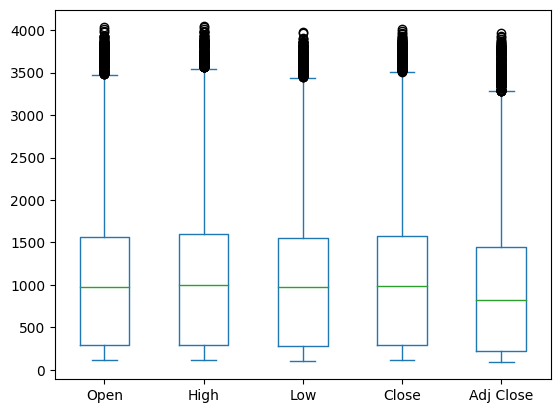

In [ ]:
df[['Open','High','Low','Close','Adj Close']].plot(kind = 'box')

In [ ]:
# Set 'Date' as the index
df.set_index('Date', inplace=True)

# Time Series Analyis

**A simple line plot showing the closing prices of TCS stock over time.**

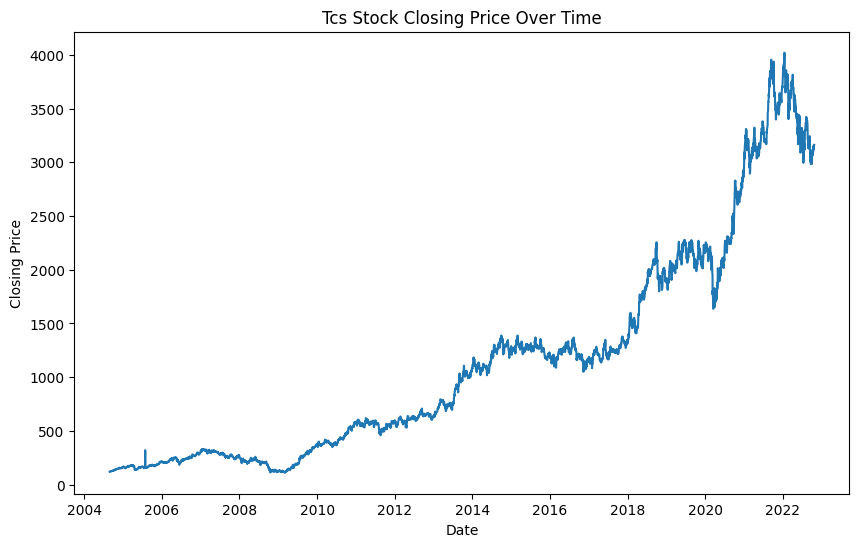

In [ ]:
# Plotting the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['Close'])
plt.title('Tcs Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.show()

By plotting the closing prices along with the 30-day rolling mean, we can visually inspect the trends in the stock prices, smoothing out short-term fluctuations to highlight longer-term patterns.

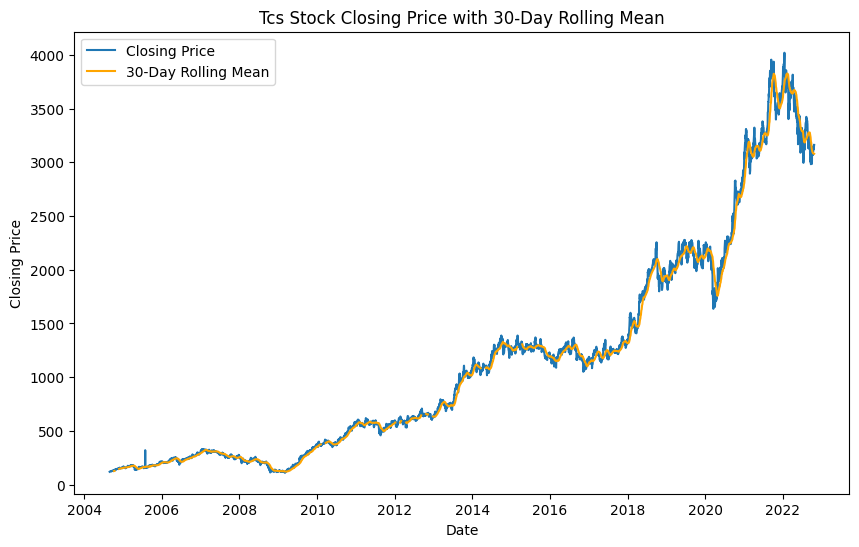

In [ ]:
# Checking for trends using rolling mean
rolling_mean = df['Close'].rolling(window=30).mean()

plt.figure(figsize=(10, 6))
plt.plot(df['Close'], label='Closing Price')
plt.plot(rolling_mean, label='30-Day Rolling Mean', color='orange')
plt.title('Tcs Stock Closing Price with 30-Day Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

In [ ]:
pip install pandas matplotlib statsmodels

A comprehensive visual representation of the decomposition of the closing prices into various components, aiding in understanding the underlying patterns and trends in the data.

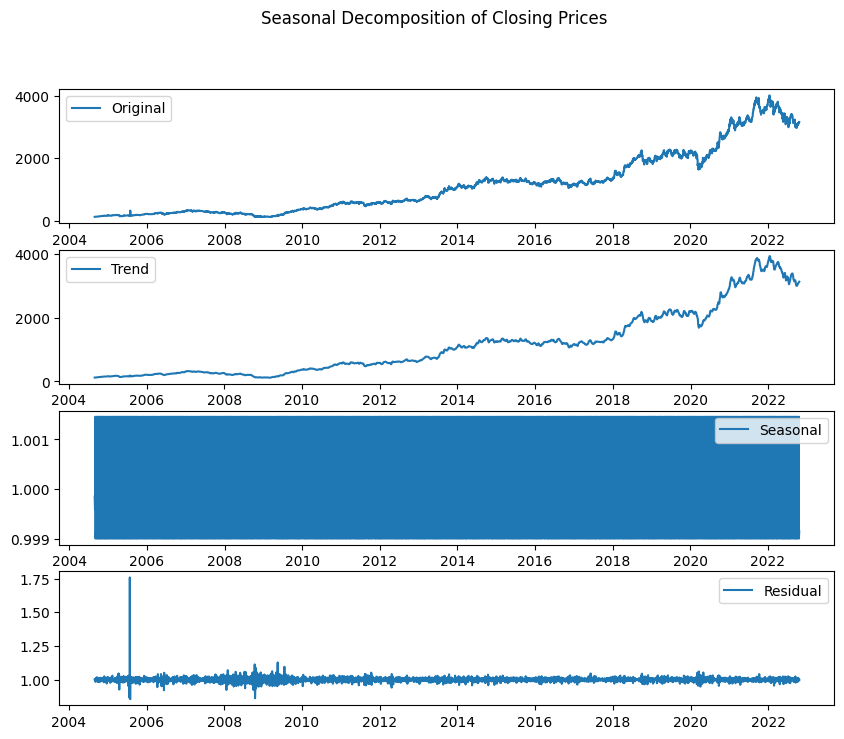

In [ ]:
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

# Perform seasonal decomposition
# Handle missing values with forward-fill
df['Close'].fillna(method='ffill', inplace=True)
seasonal_period = 7  # Assuming weekly seasonality
result = seasonal_decompose(df['Close'], model='multiplicative', period=seasonal_period)

# Plot the seasonal decomposition
plt.figure(figsize=(10, 8))
plt.subplot(4, 1, 1)
plt.plot(df['Close'], label='Original')
plt.legend()

plt.subplot(4, 1, 2)
plt.plot(result.trend, label='Trend')
plt.legend()

plt.subplot(4, 1, 3)
plt.plot(result.seasonal, label='Seasonal')
plt.legend()

plt.subplot(4, 1, 4)
plt.plot(result.resid, label='Residual')
plt.legend()

plt.suptitle('Seasonal Decomposition of Closing Prices')

plt.show()


# Linear regression model

In [ ]:
#Building the linear regression model
from sklearn.model_selection import train_test_split

#For preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

#for model evaluation
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

In [ ]:
#splitting the data into training and testing datasets
X = np.array(df.index).reshape(-1,1)
Y = df['Close']
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size = 0.3, random_state = 101)

In [ ]:
# Feature Scaling on X_train and X_test
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
# Building the model
lm = LinearRegression()
lm.fit(X_train_scaled, Y_train)

LinearRegression()

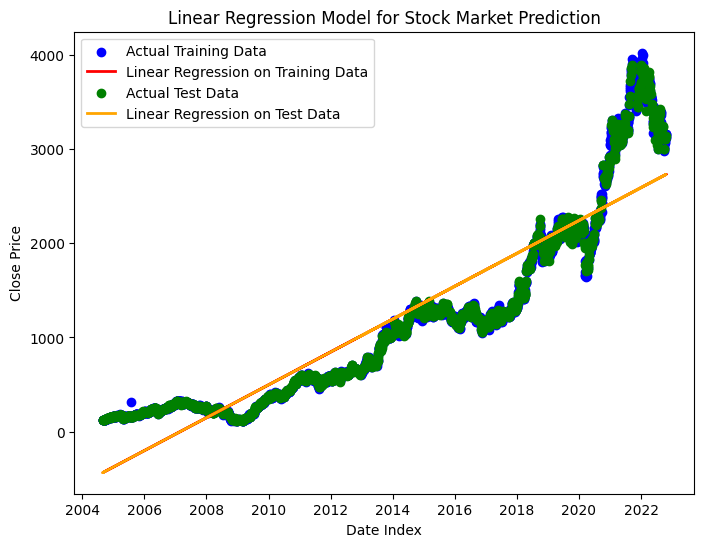

In [ ]:
# Predictions on the training set
Y_train_pred = lm.predict(X_train_scaled)

# Predictions on the test set
Y_test_pred = lm.predict(X_test_scaled)

# Plotting the training data and regression line
plt.figure(figsize=(8, 6))

# Training data
plt.scatter(X_train, Y_train, color='blue', label='Actual Training Data')

# Regression line on training data
plt.plot(X_train, Y_train_pred, color='red', linewidth=2, label='Linear Regression on Training Data')

# Test data
plt.scatter(X_test, Y_test, color='green', label='Actual Test Data')

# Regression line on test data
plt.plot(X_test, Y_test_pred, color='orange', linewidth=2, label='Linear Regression on Test Data')

# Adding labels and title
plt.xlabel('Date Index')
plt.ylabel('Close Price')
plt.title('Linear Regression Model for Stock Market Prediction')

# Display the legend
plt.legend()

# Show the plot
plt.show()


In [ ]:
# Calculate Mean Squared Error (MSE) for training set
mse_train = mse(Y_train, Y_train_pred)
print(f'Mean Squared Error (MSE) on Training Set: {mse_train:.2f}')

# Calculate R2 Score for training set
r2_train = r2_score(Y_train, Y_train_pred)
print(f'R2 Score on Training Set: {r2_train:.2f}')

# Calculate Mean Squared Error (MSE) for test set
mse_test = mse(Y_test, Y_test_pred)
print(f'Mean Squared Error (MSE) on Test Set: {mse_test:.2f}')

# Calculate R2 Score for test set
r2_test = r2_score(Y_test, Y_test_pred)
print(f'R2 Score on Test Set: {r2_test:.2f}')


Mean Squared Error (MSE) on Training Set: 157392.88
R2 Score on Training Set: 0.84
Mean Squared Error (MSE) on Test Set: 157580.10
R2 Score on Test Set: 0.84
